In [238]:
import torch, torchinfo, torchmetrics
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

In [239]:
from sklearn.datasets import make_circles

#make 1000 samples
n_samples = 1000

#create circles
x, y = make_circles(n_samples,noise = 0.03,random_state=42)

In [240]:
len(x), len (y)

(1000, 1000)

In [241]:
print(f"first 5 sameples of x:{x[:5]} ")

first 5 sameples of x:[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]] 


In [242]:
print(f"first 5 sameples of y:{y[:5]} ")

first 5 sameples of y:[1 1 1 1 0] 


In [243]:
#make a dataframe of cirlce data
circles = pd.DataFrame({"x1":x[:,0],"x2":x[:,1],"label": y})            #take x1 as the value on the left and x2 as the 2nd value on the right
circles.head(10)

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


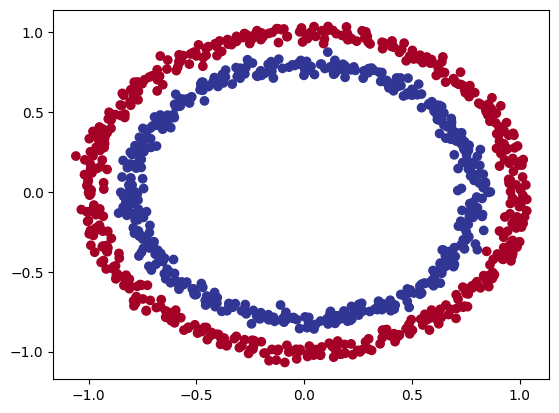

In [244]:
#visualise
plt.scatter (x=x[:,0],
             y=x[:,1],
             c=y,
             cmap = plt.cm.RdYlBu)          #change the colour

In [245]:
#data that we are working with is often referred to as a toy dataset, a dataset that is small 
# enough to experiment but still sizeable enough to pratice the fundamentals

Turning data into tensors


In [246]:
x.shape, y.shape

((1000, 2), (1000,))

In [247]:
x_tensor= torch.from_numpy(x).to(torch.float32)
y_tensor = torch.from_numpy(y).to(torch.float32)

In [248]:
x_tensor[:10], y_tensor[:10]            #see the first 10 numbers of the tensors

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967],
         [-0.4796,  0.6764],
         [-0.0136,  0.8033],
         [ 0.7715,  0.1478],
         [-0.1693, -0.7935],
         [-0.1215,  1.0215]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

In [249]:
#split data into train test split

In [250]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_tensor,
                                                    y_tensor,
                                                    test_size=0.2,           #this means 20% of the data will be allocated as test data
                                                    random_state=42)         #is like a random seed 

In [251]:
len(x_train), len(x_test)

(800, 200)

Building a model

In [252]:
#build a model to classify the blue and red dots

In [253]:
from torch import nn

device = "mps" 
if torch.backends.mps.is_available():
    print("mps is available. GPU can be used with PyTorch on Apple Silicon.")
    
    # Optionally, you can get the MPS device name
    mps_device = torch.device("mps")
    print(f"Using device: {mps_device}")
else:
    print("mps is not available. GPU cannot be used with PyTorch on Apple Silicon.")

mps is available. GPU can be used with PyTorch on Apple Silicon.
Using device: mps


In [254]:
class circlemodelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)     #takes in 2 features and upscales it to 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1)     #askes in 5 features from the previous layer and outputs a single feature 9same shape as y)

        #self.two_linear_layers = nn.Sequential(                #another way which implements the use of nn.sequential
            #nn.Linear(in_features=2, out_features=5),
            #nn.Linear(in_features=5, out_features=1)
        #)

    def forward(self,x_tensor):
        return self.layer_2(self.layer_1(x_tensor))     # x -> layer 1 ->layer 2 -> output
        #return two_linear_layers(x_tensor)
model_0 = circlemodelV0().to(device)
model_0

circlemodelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [255]:
#replicating the model using nn.sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [256]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='mps:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='mps:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='mps:0')),
             ('1.bias', tensor([-0.1213], device='mps:0'))])

In [257]:
#make predictions
with torch.inference_mode():
    untrained_preds = model_0(x_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(x_test)}, Shape: {x_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels: {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='mps:0')

First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [258]:
#the predictions do not look like the labels, so do we round?

In [259]:
#setup loss fn and optimizer
loss_fn = nn.BCEWithLogitsLoss()        #has the sigmoid activation fn built in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001)

In [260]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='mps:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='mps:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='mps:0')),
             ('1.bias', tensor([-0.1213], device='mps:0'))])

In [261]:
#calculate the accuracy (out of 100 examples what percentage is the model correct)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct / len(y_pred))*100
    return acc


Train the model

In [262]:
#view the first 5 outputs of the foward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(x_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='mps:0')

In [263]:
#use the sigmoid activation function 
y_pred_probs = torch.sigmoid(y_logits)          #turns the logits into prediction probabilities 
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='mps:0')

In [264]:
y_preds = torch.round(y_pred_probs)       #find predicted labels

y_preds_lables = torch.round(torch.sigmoid(model_0(x_test.to(device))[:5]))     #in full

print(torch.eq(y_preds.squeeze(),y_preds_lables.squeeze()))       #check for equality

y_preds.squeeze()       #get rid of exra dimension

tensor([True, True, True, True, True], device='mps:0')


tensor([0., 0., 1., 0., 1.], device='mps:0')

Training loop

In [265]:
torch.manual_seed(42)

In [266]:
#set the number of epochs
epochs = 1000

#put data into the target device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

#building the training loop and evaluation
for epoch in range(epochs):
    model_0.train()

    #1. forward pass
    y_logits = model_0(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))       #turn logits to pred prob to pred labels

    #2. calculate loss and accuracy
    loss = loss_fn(y_logits, y_train)       
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    #3. optimizer zero grad
    optimizer.zero_grad()

    #4. loss backward
    loss.backward()

    #5. optimizer step
    optimizer.step()

    ###Testing
    model_0.eval()
    with torch.inference_mode():
        #1. forward pass
        test_logits = model_0(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        #2. calculate the test loss/accuracy
        test_loss = loss_fn (test_logits, y_test)
        test_acc = accuracy_fn(y_true= y_test, y_pred=test_pred)

        #print out whats happening
    if epoch % 10 ==0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test_loss: {test_loss:.5f}, Test_acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69796, Acc: 51.88% | Test_loss: 0.69462, Test_acc: 57.50%
Epoch: 10 | Loss: 0.69793, Acc: 52.00% | Test_loss: 0.69459, Test_acc: 57.50%
Epoch: 20 | Loss: 0.69790, Acc: 52.12% | Test_loss: 0.69457, Test_acc: 57.50%
Epoch: 30 | Loss: 0.69787, Acc: 52.25% | Test_loss: 0.69455, Test_acc: 58.00%
Epoch: 40 | Loss: 0.69784, Acc: 52.25% | Test_loss: 0.69453, Test_acc: 58.00%
Epoch: 50 | Loss: 0.69782, Acc: 52.38% | Test_loss: 0.69450, Test_acc: 58.00%
Epoch: 60 | Loss: 0.69779, Acc: 52.38% | Test_loss: 0.69448, Test_acc: 58.00%
Epoch: 70 | Loss: 0.69776, Acc: 52.12% | Test_loss: 0.69446, Test_acc: 58.00%
Epoch: 80 | Loss: 0.69773, Acc: 52.00% | Test_loss: 0.69444, Test_acc: 58.00%
Epoch: 90 | Loss: 0.69770, Acc: 52.00% | Test_loss: 0.69442, Test_acc: 58.00%
Epoch: 100 | Loss: 0.69768, Acc: 52.00% | Test_loss: 0.69440, Test_acc: 58.00%
Epoch: 110 | Loss: 0.69765, Acc: 51.88% | Test_loss: 0.69438, Test_acc: 58.00%
Epoch: 120 | Loss: 0.69762, Acc: 51.88% | Test_loss: 0.69436, T

In [267]:
#make prediction and evaluate the model
import requests
from pathlib import Path

#download helper functions from pytorch repo on github
request =requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

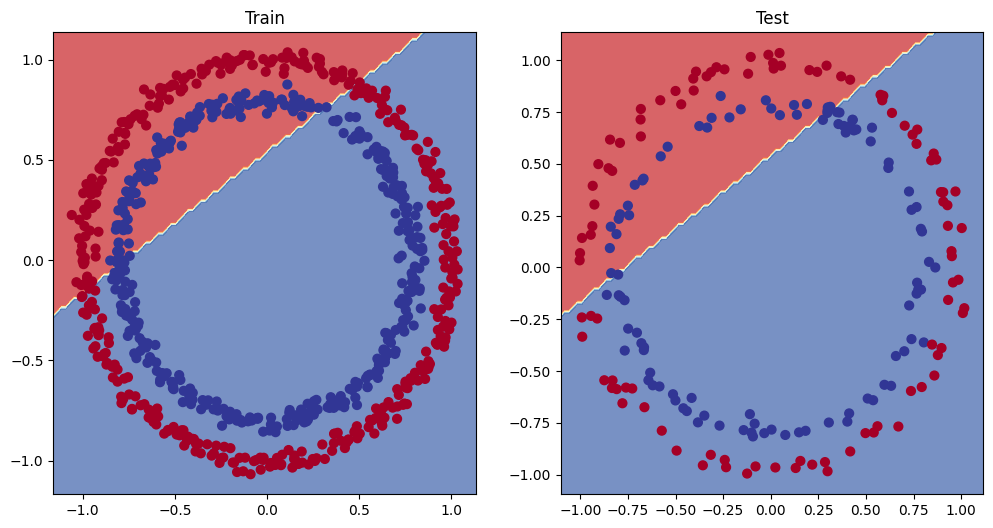

In [268]:
#plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,x_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,x_test,y_test)


Improving the model (from a model perspective)



In [269]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0836, -0.2856],
                      [ 0.4659, -0.5508],
                      [-0.3264, -0.1987],
                      [-0.4239,  0.0638],
                      [-0.6995,  0.6413]])),
             ('0.bias', tensor([-0.6025,  0.5373,  0.1165, -0.2262,  0.4339])),
             ('1.weight',
              tensor([[ 0.0793,  0.3316,  0.0447, -0.1300,  0.1295]])),
             ('1.bias', tensor([-0.1462]))])

In [270]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x_tensor):
        z = self.layer_1(x_tensor)
        z = self.layer_2(z)
        z = self.layer_3(z)
        return z
        #return self.layer_3(self.layer_2(self.layer_1(x_tensor)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [271]:
#new model has more hidden layers and units